<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Classification-with-Learn2ClassifyMany" data-toc-modified-id="Classification-with-Learn2ClassifyMany-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification with Learn2ClassifyMany</a></span></li><li><span><a href="#Classification-using-NearestSubspace-Algorithm" data-toc-modified-id="Classification-using-NearestSubspace-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification using NearestSubspace Algorithm</a></span></li><li><span><a href="#Classification-using-a-Multi-layer-perceptron" data-toc-modified-id="Classification-using-a-Multi-layer-perceptron-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification using a Multi-layer perceptron</a></span><ul class="toc-item"><li><span><a href="#Classification-using-a-single-linear-layer-and-a-softmax-output-layer" data-toc-modified-id="Classification-using-a-single-linear-layer-and-a-softmax-output-layer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Classification using a single linear layer and a softmax output layer</a></span></li><li><span><a href="#Classification-using-a-single-non-linear--layer-and-softmax-output-layer" data-toc-modified-id="Classification-using-a-single-non-linear--layer-and-softmax-output-layer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classification using a single non-linear  layer and softmax output layer</a></span></li><li><span><a href="#Classification-using-a-deep-network-and-softmax-output-layer" data-toc-modified-id="Classification-using-a-deep-network-and-softmax-output-layer-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Classification using a deep network and softmax output layer</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Loading the data

In [34]:
using JLD2, Plots
gr(
    label=""
)
include("deps.jl")  # plot dependencies 
@load "fashion_data.jld2" train_x  train_y test_x test_y

4-element Array{Symbol,1}:
 :train_x
 :train_y
 :test_x 
 :test_y 

In [35]:
size(train_x)

(28, 28, 60000)

In [36]:
size(train_y)

(60000,)

In [37]:
unique(train_y)

10-element Array{Int64,1}:
 9
 0
 3
 2
 7
 5
 1
 6
 4
 8

The `findall` command in the next cell returns the indices in `train_y` that equal `1`. The `[1]` returns the first element of that list. 

In [38]:
item_idx = 0:9
idx_first_item = findall(train_y .== item_idx[2])[1]

17

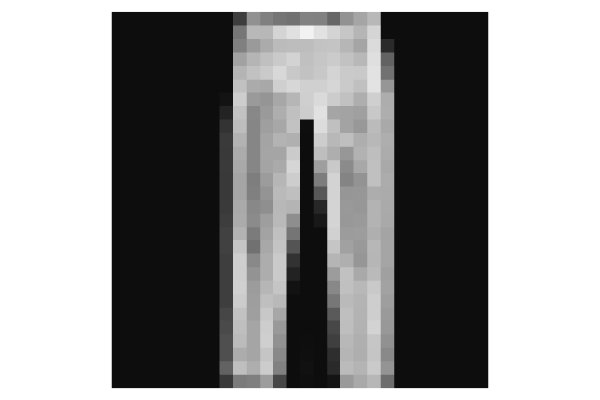

In [39]:
imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item]),color=:grays,transpose=:true)

**Exercise** : Write code to display all 10 items in a 2 x 5 grid.  

See [here](https://lectures.quantecon.org/jl/julia_plots.html) for examples using the `Plots` package.

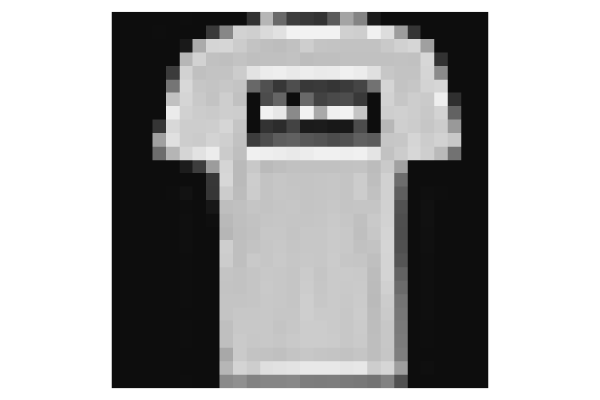

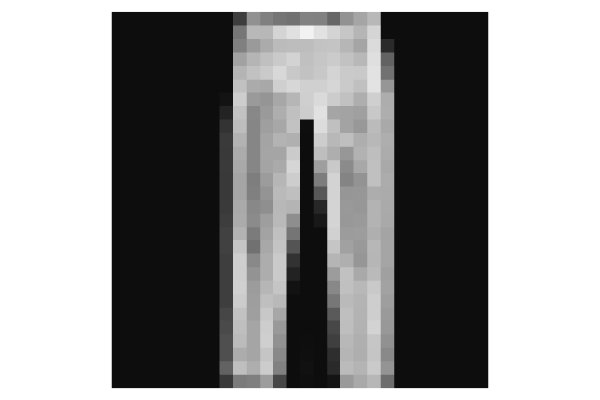

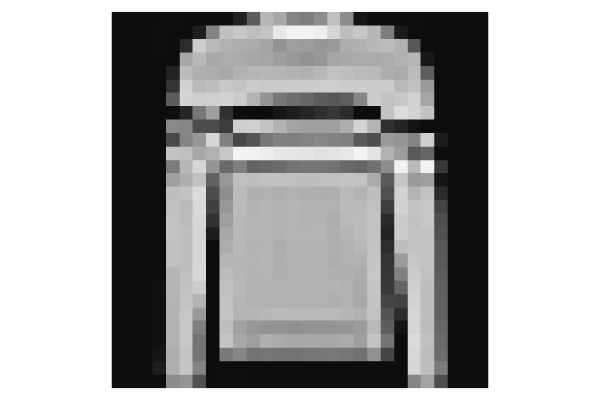

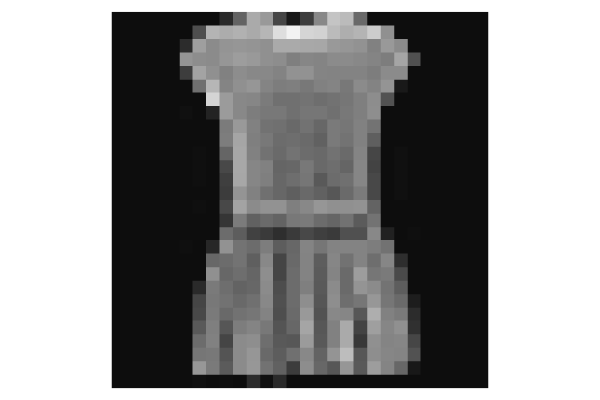

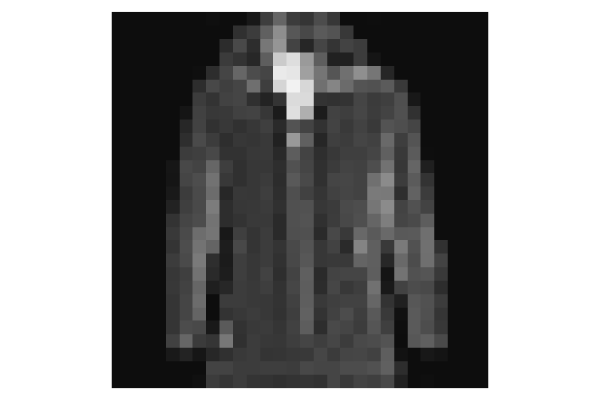

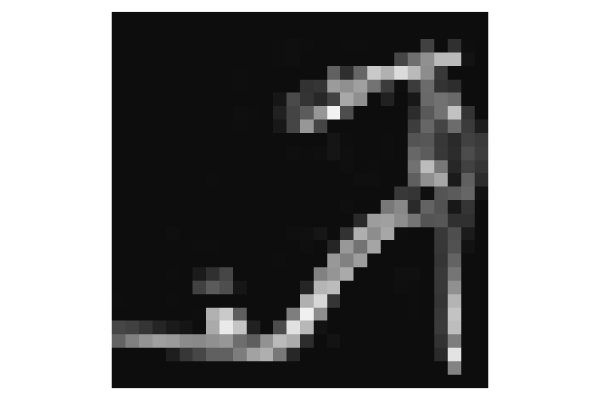

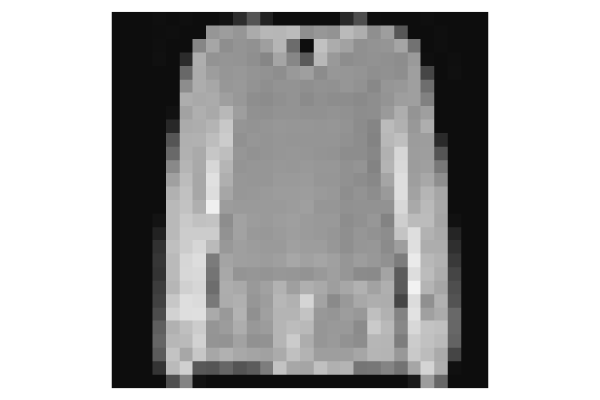

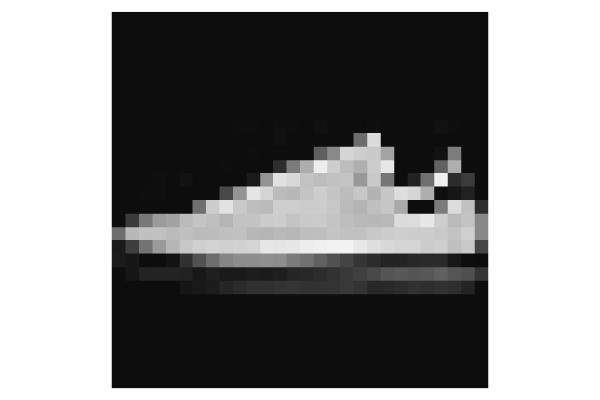

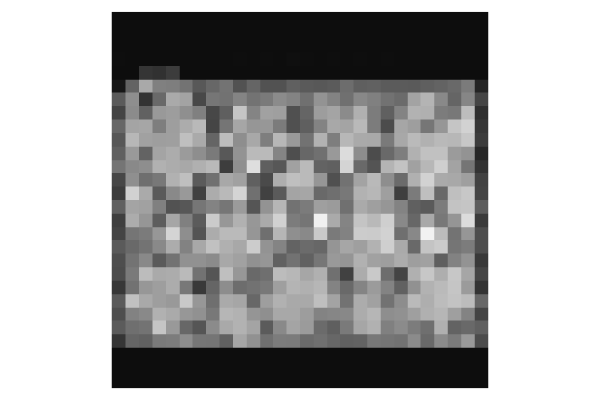

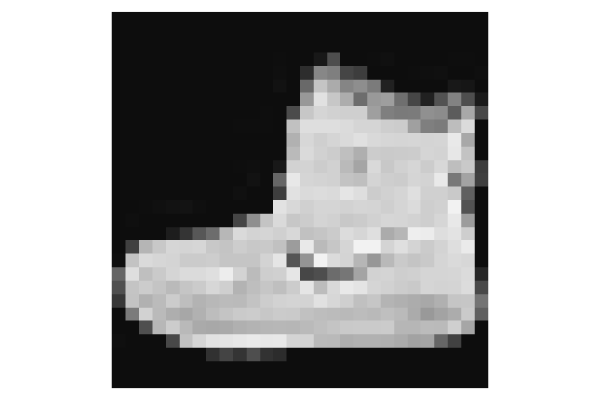

In [40]:
for i=item_idx
    idx_first_item = findall(train_y .== item_idx[i+1])[1]
    pi=imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item]),color=:grays,transpose=:true);
    display(plot(pi))
end


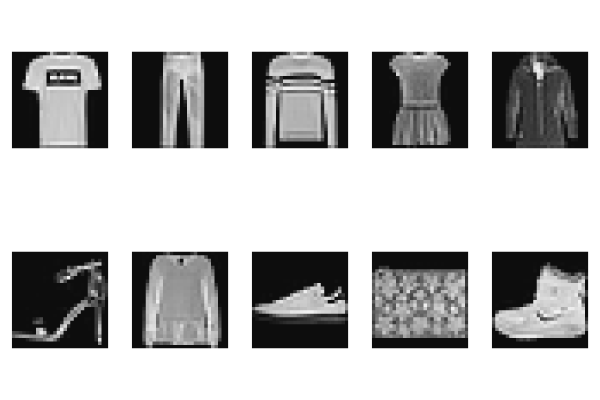

In [41]:
## TODO: Display all 10 items in a 2 x 5 grid
p=[]
for i=item_idx
    idx_first_item = findall(train_y .== item_idx[i+1])[1]
    pi=imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item]),color=:grays,transpose=:true);
    p=push!(p,pi)  
end
plot(p...,layout=(2,5))

# Classification with Learn2ClassifyMany

In [42]:
using Pkg
include("MyLearn2ClassifyMany.jl")

Initializing MyLearn2ClassifyMany module ... 


load_digit_data (generic function with 4 methods)

In [43]:
train_x=reshape(train_x,784, :)
idx_item = findall(train_y .== item_idx[0+1])
x0 = train_x[:,idx_item];

In [44]:
idx_item = findall(train_y .== item_idx[1+1])
x1 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[2+1])
x2 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[3+1])
x3 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[4+1])
x4 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[5+1])
x5 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[6+1])
x6 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[7+1])
x7 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[8+1])
x8 = train_x[:,idx_item];
idx_item = findall(train_y .== item_idx[9+1])
x9 = train_x[:,idx_item];
x=hcat(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9);

In [81]:
y_matrix = zeros(10,60000)
for i in 1:60000
    y=zeros(10)
    y_matrix[train_y[i]+1,i] = 1
end

In [45]:
size(x)

(784, 60000)

In [ ]:
xtest = hcat((reshape(x[:, :, 501:1000], 784, :) for x in (x0, x1, x2))...)

test_labels = kron(1:num_digits, ones(500))
yvector = hcat(
    kron(ones(500)', class_encoding_matrix[:, 1]),
    kron(ones(500)', class_encoding_matrix[:, 2]),
    kron(ones(500)', class_encoding_matrix[:, 3])
)

In [45]:
y=[4,7]
vt=[]
for yi in y
v=zeros(10)
v[yi+1]=1
push!(vt,v)
end
vt

2-element Array{Any,1}:
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]

In [52]:
##TODO: Your code here using functions from your module  -- include a plot of P(correct) versus number of classes
#P_correct = mean(label_est[label_vector .== 1] .== 1)
using LinearAlgebra
pcorrect_vec = zeros(9)
f_a = linear
df_a = dlinear

for k in 2:10
    data_digits = collect(0:(k - 1))
    num_digits = length(data_digits)

    #x = [train_x[:,idx_item] for d in data_digits]

    # one-hot encoding matrix
    class_encoding_matrix = diagm(0 => ones(num_digits)) # what's this?

    # training input: first half of samples for each digit
    #xtrain = x[:,1:6000*num_digits]
    
    # desired output for training input
    yvector = hcat((kron(ones(60000)', class_encoding_matrix[:, i]) for i in 1:num_digits)...)

    # initialize parameters
    d = size(train_x, 1)
    mu = 1e-11
    W0 = zeros(num_digits, d)
    b0 = zeros(num_digits)
    iters = 2000
    
    # train the network
    W, b, loss = learn2classify_asgd_1layer(
        f_a, df_a, grad_loss_1layer_1output,
        train_x, yvector, W0, b0, mu, iters, batch_size
)

    # testing input (second half of samples) and correct labels
   #  xtest = hcat((reshape(xi[:, :, 501:1000], 784, :) for xi in x)...)
    test_x = reshape(test_x, 784, :)
    # test_labels = kron(1:num_digits, ones(10000))
    
    # use trained network to classify testing input
    Y = f_a.(W * test_x .+ b)
    class_predictions = vec(mapslices(x -> findmax(x)[2], Y; dims=1))  #why it is 2

    # compute accuracy
    #pcorrect_vec[k - 1] = sum(class_predictions .== test_labels) / length(test_labels)
    pcorrect_vec[k - 1] = sum(class_predictions .== test_y)/ length(test_y)
end

# this is the plot we're after
scatter(2:10, pcorrect_vec; xlabel="Number of digits", ylabel="Classification accuracy")

ErrorException: invalid redefinition of constant loss

# Classification using NearestSubspace Algorithm

In [18]:
using Pkg
include("MyNearestSubspaceClassifier.jl")

Initializing MyNearestSubspaceClassifier module ... 


classify_nearest_ss (generic function with 2 methods)

In [100]:
classify_nearest_ss

classify_nearest_ss (generic function with 2 methods)

In [21]:
##TODO: Your code here  -- include a plot of P(correct versus k)
## Your plot should also include a line for nearest mean based classification 
using JLD

# load train data
train_x = reshape(train_x,784,:)

# load test data
# data = load("test_digits.jld")
#test = data["test_data"]
#test_label = data["test_label"]
test_x = reshape(test_x,784,:)
test_label = test_y

# m, n, d = size(train_x)
# T = length(test_label)
# p = Integer(sqrt(m))

digits = collect(0:9)
subspace_label = digits .+ 1 # digit "0" corresponds to first subspace and so on.

digit2subspace = Dict(string(digits[i]) => subspace_label[i] for i in 1:length(digits) )
subspace2digit = Dict(value => key for (key, value) in digit2subspace)

Dict{Int64,String} with 10 entries:
  7  => "6"
  9  => "8"
  4  => "3"
  10 => "9"
  2  => "1"
  3  => "2"
  5  => "4"
  8  => "7"
  6  => "5"
  1  => "0"

In [ ]:
using LinearAlgebra: svd
U0 = svd(x0).U;
U1 = svd(x1).U;
U2 = svd(x2).U;
U3 = svd(x3).U;
U4 = svd(x4).U;
U5 = svd(x5).U;
U6 = svd(x6).U;
U7 = svd(x7).U;
U8 = svd(x8).U;
U9 = svd(x9).U;
U=hcat(U0,U1,U2,U3,U4,U5,U6,U7,U8,U9);
U=reshape(U,784,784,10);

In [25]:
k = 30
test_image = test_x[:, rand(1:size(test_x, 2))]
pcorrect(predicted_label, test_label) = sum(predicted_label .== test_label) / length(test_label)
#trainU = learn_nearest_ss(train_x, 784);
predicted_labels = classify_nearest_ss(test_x, U, k) .- 1
@show pcorrect(predicted_labels, test_label);

pcorrect(predicted_labels, test_label) = 0.8381


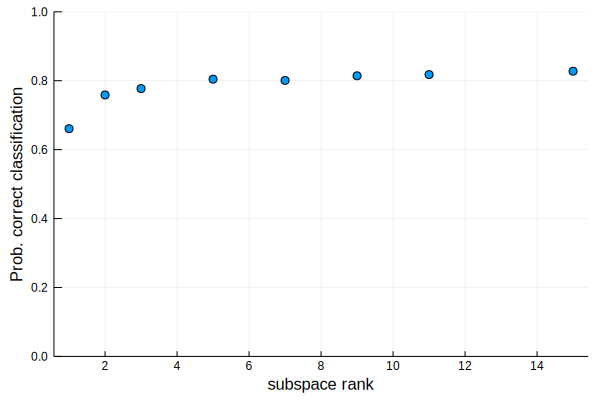

785.247667 seconds (23.77 M allocations: 15.816 GiB, 0.59% gc time)


In [26]:
klist = [1, 2, 3, 5, 7, 9, 11, 15]

pcorrect_svd = zeros(length(klist))
@time for idx in 1:length(klist)
    pcorr = pcorrect(classify_nearest_ss(test_x, U, klist[idx]) .- 1, test_label)
    pcorrect_svd[idx] = pcorr
    IJulia.clear_output(true)
    display(scatter(
            klist[1:idx],
            pcorrect_svd[1:idx],
            ylims=(0, 1),
            xlabel="subspace rank",
            ylabel="Prob. correct classification", 
            label=""
            ))
end

# Classification using a Multi-layer perceptron

In [1]:
using Flux 

## Classification using a single linear layer and a softmax output layer

In [65]:
##TODO: Your code here  -- use one-hot encoding and cross entropy loss 
using Flux: onehotbatch, argmax, crossentropy, throttle, mse
using Base.Iterators: repeated, partition
using Flux: shuffle
using Flux, Flux.Data.MNIST
imgs = MNIST.images()
labels = MNIST.labels()
#X = hcat(float.(reshape.(imgs, :))...) 

test_X = hcat(float.(reshape.(MNIST.images(:test), :))...) 
test_Y = onehotbatch(MNIST.labels(:test), 0:9);

loss_fn = crossentropy

m = Chain(Dense(28^2, 10), softmax) 
loss(x, y) = loss_fn(m(x), y) 
X = train_x
Y = train_y
opt = ADAM() 

epochs = 4 # each epoch is one pass through data 
batch_size = 32
accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))
evalcb = () -> @show([Tracker.data(loss(X,Y)), accuracy(test_X, test_Y)])
for epoch_idx in 1:epochs 
    dataset = [(X[:, i], Y[:, i]) for i in partition(shuffle(1:size(X, 2)), batch_size)] # create mini-batches
    Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 1.0))
end

BoundsError: BoundsError: attempt to access 60000-element Array{Int64,1} at index [Base.Slice(Base.OneTo(60000)), [11948, 24302, 45312, 53292, 39165, 46675, 13968, 57484, 41036, 15110, 50364, 16519, 55001, 31281, 20668, 28074, 29699, 17021, 43149, 37270, 2197, 58893, 8819, 36041, 6690, 6490, 15194, 52304, 40834, 9192, 33963, 49388]]

## Classification using a single non-linear  layer and softmax output layer

In [0]:
##TODO: Your code here  -- use one-hot encoding, non-linear activation for hidden layer, softmaxand cross entropy loss 
loss_fn = crossentropy

m = Chain(Dense(28^2, 10, ReLu), softmax) 
loss(x, y) = loss_fn(m(x), y) 
X = trainx_x
Y= train_y
opt = ADAM() 
using Flux: shuffle
epochs = 4 # each epoch is one pass through data 
batch_size = 32
for epoch_idx in 1:epochs 
    dataset = [(X[:, i], Y[:, i]) for i in partition(shuffle(1:size(X, 2)), batch_size)] # create mini-batches
    Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 1.0))
end

## Classification using a deep network and softmax output layer

The objective here is to design a deeper neural network that outperforms the single layer + `softmax` network. Many solutions are correct so you just need to come up with one with trial and error. 


In [0]:
##TODO: Your code here  -- use one-hot encoding and MSE loss 

In [0]:
loss_fn = crossentropy
m = Chain(
         Dense(28^2, 32, relu), 
         Dense(32, 160, relu),
         Dense(160, 10, relu),
         softmax)  
loss(x, y) = loss_fn(m(x), y) 
X = trainx_x
Y= train_y
opt = ADAM() 
using Flux: shuffle
epochs = 4 # each epoch is one pass through data 
batch_size = 32
for epoch_idx in 1:epochs 
    dataset = [(X[:, i], Y[:, i]) for i in partition(shuffle(1:size(X, 2)), batch_size)] # create mini-batches
    Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 1.0))
end


# Summary

In [0]:
using DataFrames

Create a `DataFrame` that summarizes the performance of the various methods. Submit this table.

See [here](https://github.com/bkamins/Julia-DataFrames-Tutorial/blob/master/01_constructors.ipynb) for instructions on how to create a DataFrame.